In [1]:
import nltk
nltk.download('punkt')
import pandas as pd
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model

[nltk_data] Downloading package punkt to /home/nivedita/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/home/nivedita/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
2024-07-11 15:31:24.158965: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-11 15:31:24.180583: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-11 15:31:24.219022: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register fa

In [2]:
# Loading The Data The dataset can be found in kaggle website https://www.kaggle.com/c/fake-news/data?select=test.csv
df_train = pd.read_csv("./fake-news/train.csv")##we will work with this dataset. 
#The data will be split into train and test part in order to calculate performance of the model 
##df_test = pd.read_csv("test.csv")

In [3]:

# Combining Title And Text Together
df_train['original'] = df_train['title'] + ' ' + df_train['text']
df_train.head()

id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  \
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1   
1  Ever get the feeling your life circles the rou...      0   
2  Why the Truth Might Get You Fired October 29, ...      1   
3  Videos 15 Civilians Killed In Single US Airstr...      1   
4  Print \nAn Iranian woman has been sentenced to...      1   

                                            original  
0  House Dem Aide: We Didn’t Even See Comey’s Let...  
1  FLYNN: Hillary Clinton, Big Woman on Campus - ...  
2  Why the Truth Might Get You Fired Why the Trut...  
3  15 Civilians Killed In Single US Airstrike Hav...  
4  Iranian woman jailed for fictional unpublished...

In [4]:
df_train['original'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking members of the House In

In [5]:
#df_test

# Data preprocessing

In [6]:
#Downloading Stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/nivedita/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
# Obtaining Additional Stopwords From nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [8]:
# This preprocess function removes Stopwords And Words With 2 Or Less Characters
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
            result.append(token)
            
    return result

In [9]:

# Applying The Function To The Dataframe
df_train['clean'] = df_train['original'].astype(str).apply(preprocess)

In [10]:
# Showing Cleaned Up News After Removing Stopwords
print(df_train['clean'][0])

['house', 'aide', 'comey', 'letter', 'jason', 'chaffetz', 'tweeted', 'house', 'aide', 'comey', 'letter', 'jason', 'chaffetz', 'tweeted', 'darrell', 'lucus', 'october', 'subscribe', 'jason', 'chaffetz', 'stump', 'american', 'fork', 'utah', 'image', 'courtesy', 'michael', 'jolley', 'available', 'creative', 'commons', 'license', 'apologies', 'keith', 'olbermann', 'doubt', 'worst', 'person', 'world', 'week', 'director', 'james', 'comey', 'according', 'house', 'democratic', 'aide', 'looks', 'like', 'know', 'second', 'worst', 'person', 'turns', 'comey', 'sent', 'infamous', 'letter', 'announcing', 'looking', 'emails', 'related', 'hillary', 'clinton', 'email', 'server', 'ranking', 'democrats', 'relevant', 'committees', 'hear', 'comey', 'tweet', 'republican', 'committee', 'chairmen', 'know', 'comey', 'notified', 'republican', 'chairmen', 'democratic', 'ranking', 'members', 'house', 'intelligence', 'judiciary', 'oversight', 'committees', 'agency', 'reviewing', 'emails', 'recently', 'discovered',

In [11]:
df_train.head(3)

id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   

                                                text  label  \
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1   
1  Ever get the feeling your life circles the rou...      0   
2  Why the Truth Might Get You Fired October 29, ...      1   

                                            original  \
0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2  Why the Truth Might Get You Fired Why the Trut...   

                                               clean  
0  [house, aide, comey, letter, jason, chaffetz, ...  
1  [flynn, hillary, clinton, woman, campus, breit...  
2  [truth, fired, truth, fired, october, tension,...

In [12]:
# Obtaining The Total Words Present In The Dataset
list_of_words = []
for i in df_train.clean:
    for j in i:
        list_of_words.append(j)

In [13]:
df_train.shape

(20800, 7)

In [14]:
# Obtaining The Total Number Of Unique Words
total_words = len(list(set(list_of_words)))
total_words

168305

In [15]:
# Joining The Words Into A String
df_train['clean_joined'] = df_train['clean'].apply(lambda x: " ".join(x))

In [16]:
df_train.head(3)

id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   

                                                text  label  \
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1   
1  Ever get the feeling your life circles the rou...      0   
2  Why the Truth Might Get You Fired October 29, ...      1   

                                            original  \
0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2  Why the Truth Might Get You Fired Why the Trut...   

                                               clean  \
0  [house, aide, comey, letter, jason, chaffetz, ...   
1  [flynn, hillary, clinton, woman, campus, breit...   
2  [truth, fired, truth, fired, october, tension,...   

                                        clean_joined  
0  house aide comey letter jason chaffetz tweeted...  
1  flynn hillary clinton woman campus breitbart f...  
2  truth fired truth fired october tension intell...

In [17]:
df_train['clean_joined'][0]

'house aide comey letter jason chaffetz tweeted house aide comey letter jason chaffetz tweeted darrell lucus october subscribe jason chaffetz stump american fork utah image courtesy michael jolley available creative commons license apologies keith olbermann doubt worst person world week director james comey according house democratic aide looks like know second worst person turns comey sent infamous letter announcing looking emails related hillary clinton email server ranking democrats relevant committees hear comey tweet republican committee chairmen know comey notified republican chairmen democratic ranking members house intelligence judiciary oversight committees agency reviewing emails recently discovered order contained classified information long letter went oversight committee chairman jason chaffetz political world ablaze tweet informed learned existence emails appear pertinent investigation case reopened jason chaffetz jasoninthehouse october course know case comey actually sa

<Axes: xlabel='count', ylabel='label'>

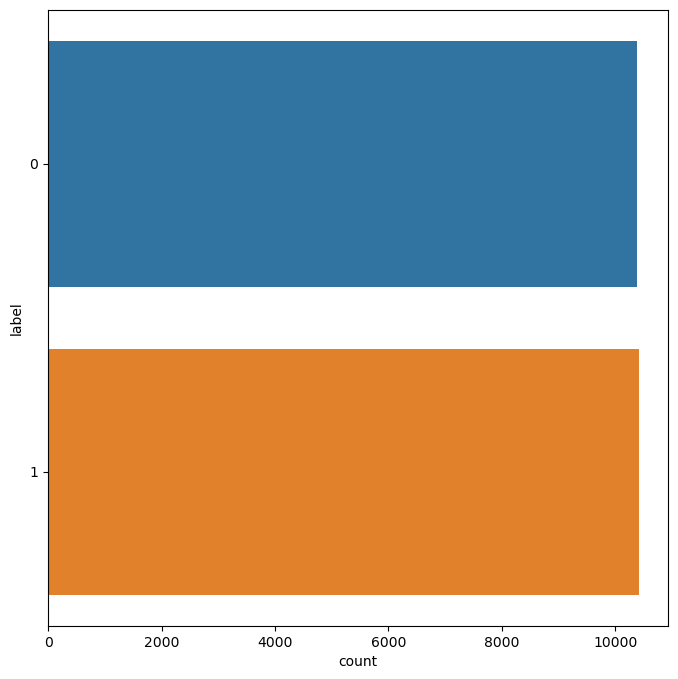

In [18]:
# Plotting The Number Of Samples In 'subject'
plt.figure(figsize = (8, 8))
sns.countplot(y = "label", data = df_train)

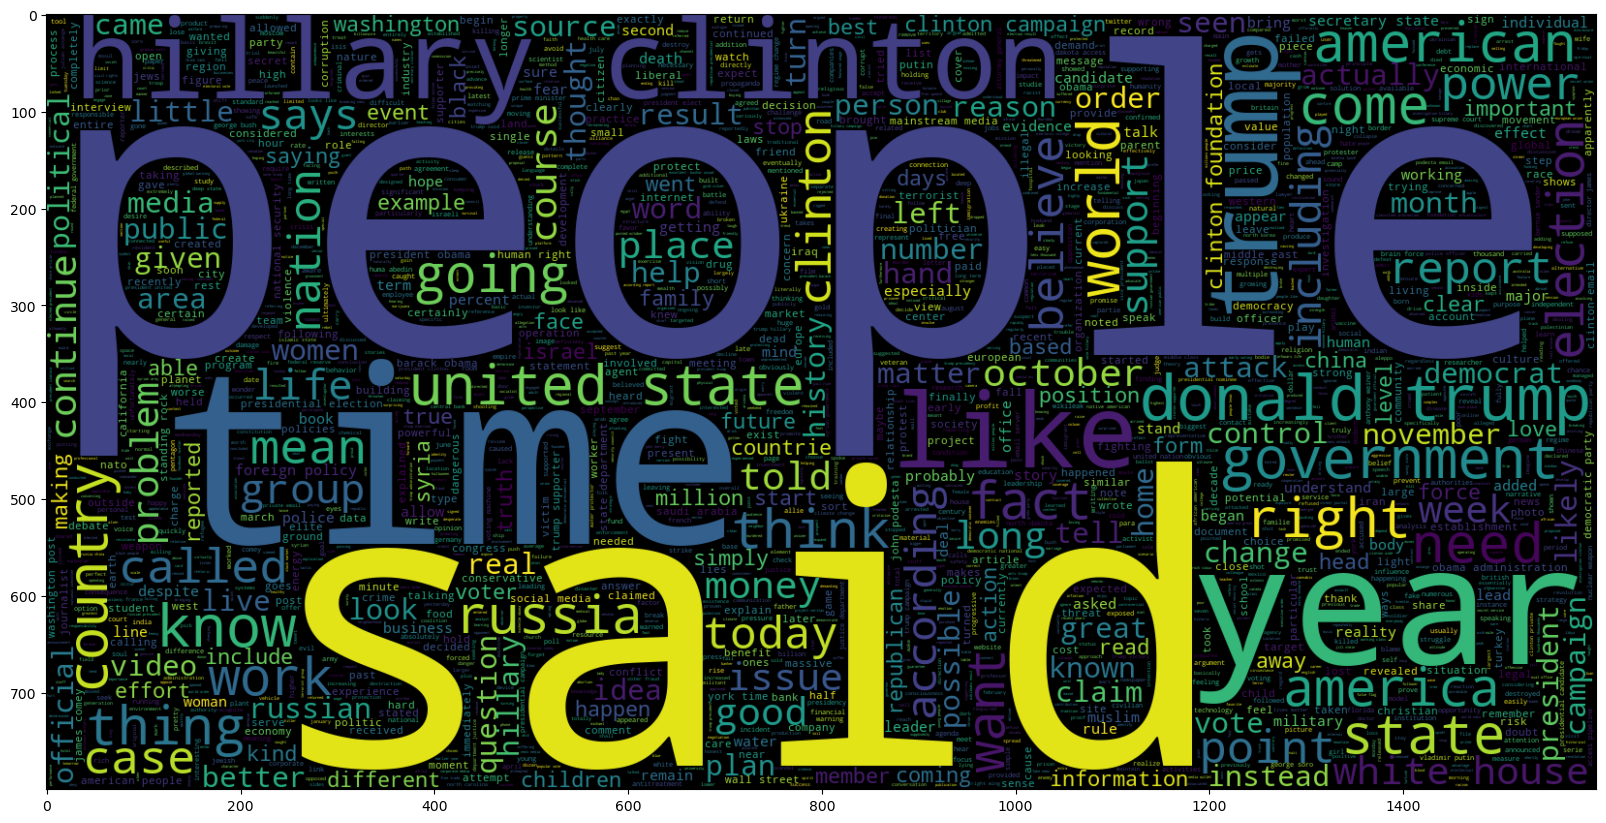

In [19]:
# Plotting The Word Cloud For Text That Is Real
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df_train[df_train.label == 1].clean_joined))
plt.imshow(wc, interpolation = 'bilinear')

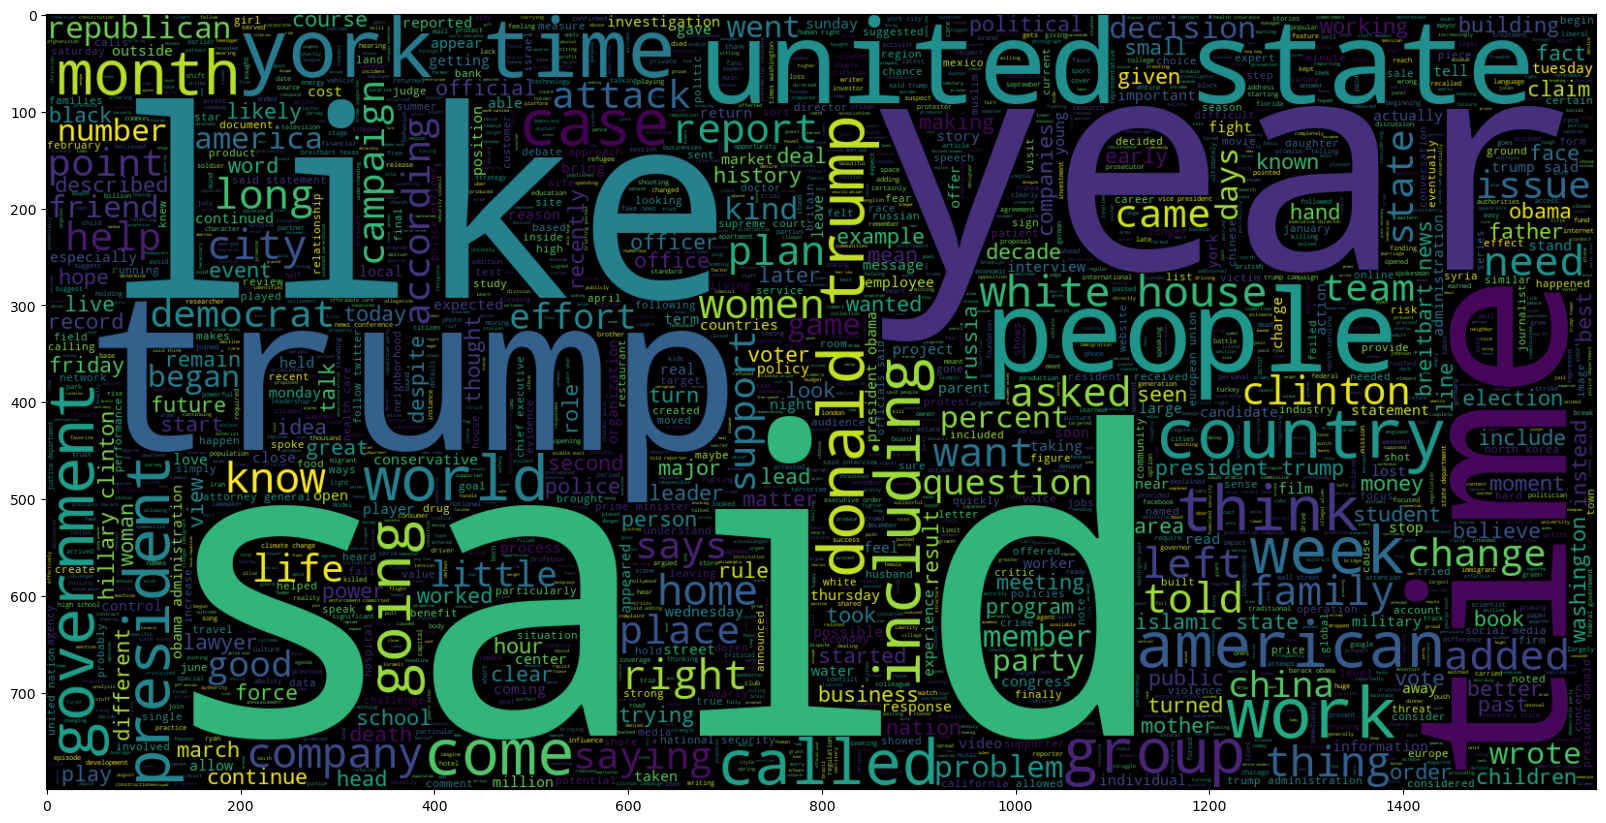

In [20]:
# Plotting The Word Cloud For Text That Is Real
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df_train[df_train.label == 0].clean_joined))
plt.imshow(wc, interpolation = 'bilinear')

In [21]:
# Determining The Maximum Number Of Words In Any Document Required To Create Word Embeddings 
maxlen = -1
for doc in df_train.clean_joined:
    tokens = nltk.word_tokenize(doc)
    if(maxlen<len(tokens)):
        maxlen = len(tokens)
print("The maximum number of words in any document is =", maxlen)

The maximum number of words in any document is = 13689


In [22]:
# Visualizing The Distribution Of Number Of Words In A Text
import plotly.express as px
fig = px.histogram(x = [len(nltk.word_tokenize(x)) for x in df_train.clean_joined], nbins = 100)
fig.show()

# Training the model

In [23]:
# Splitting Data Into Test And Train 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_train.clean_joined, df_train.label, test_size = 0.2)

In [24]:
from nltk import word_tokenize


In [25]:
# Creating A Tokenizer To Tokenize The Words And Create Sequences Of Tokenized Words
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(x_train)
train_sequences = tokenizer.texts_to_sequences(x_train)
test_sequences = tokenizer.texts_to_sequences(x_test)

In [26]:
print("The encoding for document\n",df_train.clean_joined[0],"\n is : ",train_sequences[0])


The encoding for document
 house aide comey letter jason chaffetz tweeted house aide comey letter jason chaffetz tweeted darrell lucus october subscribe jason chaffetz stump american fork utah image courtesy michael jolley available creative commons license apologies keith olbermann doubt worst person world week director james comey according house democratic aide looks like know second worst person turns comey sent infamous letter announcing looking emails related hillary clinton email server ranking democrats relevant committees hear comey tweet republican committee chairmen know comey notified republican chairmen democratic ranking members house intelligence judiciary oversight committees agency reviewing emails recently discovered order contained classified information long letter went oversight committee chairman jason chaffetz political world ablaze tweet informed learned existence emails appear pertinent investigation case reopened jason chaffetz jasoninthehouse october course k

In [27]:
# Adding Padding
padded_train = pad_sequences(train_sequences,maxlen = 40, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences,maxlen = 40, truncating = 'post')

In [28]:
for i,doc in enumerate(padded_train[:2]):
     print("The padded encoding for document",i+1," is : ",doc)


The padded encoding for document 1  is :  [    4   937  3144     4 16935  1654   184 10982     4   937  3144     4
 16935  1654   184 10982  3144     4   872   262  1998    78  1323  1277
 15495   248  3939    92 24932  1654 10542  5449  3418     4    30  9796
   542   716   313  3144]
The padded encoding for document 2  is :  [ 1217  1819  8364   260   222   512  1696   124  1115    81   350  1217
  1543  1819  4016   216   222   512    20    46   441  1187  1527  3402
  5197   504  6062   659 13269  2248   108     7  9635  1120  7103   103
   469  1527   362  1193]


In [29]:
# Sequential Model
model = Sequential()

# Embeddidng layer
model.add(Embedding(total_words, output_dim = 128))


# Bi-Directional RNN and LSTM
model.add(Bidirectional(LSTM(128)))

# Dense layers
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1,activation= 'sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [30]:
total_words

168305

In [31]:

y_train = np.asarray(y_train)

In [32]:
# Training the model
model.fit(padded_train, y_train, batch_size = 64, validation_split = 0.1, epochs = 5)


Epoch 1/5
234/234 ━━━━━━━━━━━━━━━━━━━━ 34s 121ms/step - acc: 0.8666 - loss: 0.2888 - val_acc: 0.9633 - val_loss: 0.0999
Epoch 2/5
234/234 ━━━━━━━━━━━━━━━━━━━━ 23s 99ms/step - acc: 0.9901 - loss: 0.0327 - val_acc: 0.9627 - val_loss: 0.1248
Epoch 3/5
234/234 ━━━━━━━━━━━━━━━━━━━━ 25s 108ms/step - acc: 0.9990 - loss: 0.0062 - val_acc: 0.9537 - val_loss: 0.1910
Epoch 4/5
234/234 ━━━━━━━━━━━━━━━━━━━━ 28s 120ms/step - acc: 0.9993 - loss: 0.0016 - val_acc: 0.9573 - val_loss: 0.1578
Epoch 5/5
234/234 ━━━━━━━━━━━━━━━━━━━━ 28s 119ms/step - acc: 0.9996 - loss: 0.0019 - val_acc: 0.9549 - val_loss: 0.2242


# Model performance

In [33]:
# Making prediction
pred = model.predict(padded_test)

130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step


In [34]:
# If The Predicted Value Is >0.95 (i.e., More Than 95%), It Is Real Else It Is Fake
prediction = []
for i in range(len(pred)):
    if pred[i].item() > 0.95:
        prediction.append(1)
    else:
        prediction.append(0)

In [35]:
# Getting The Accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(list(y_test), prediction)

print("Model Accuracy : ", accuracy)

Model Accuracy :  0.9403846153846154


<Axes: >

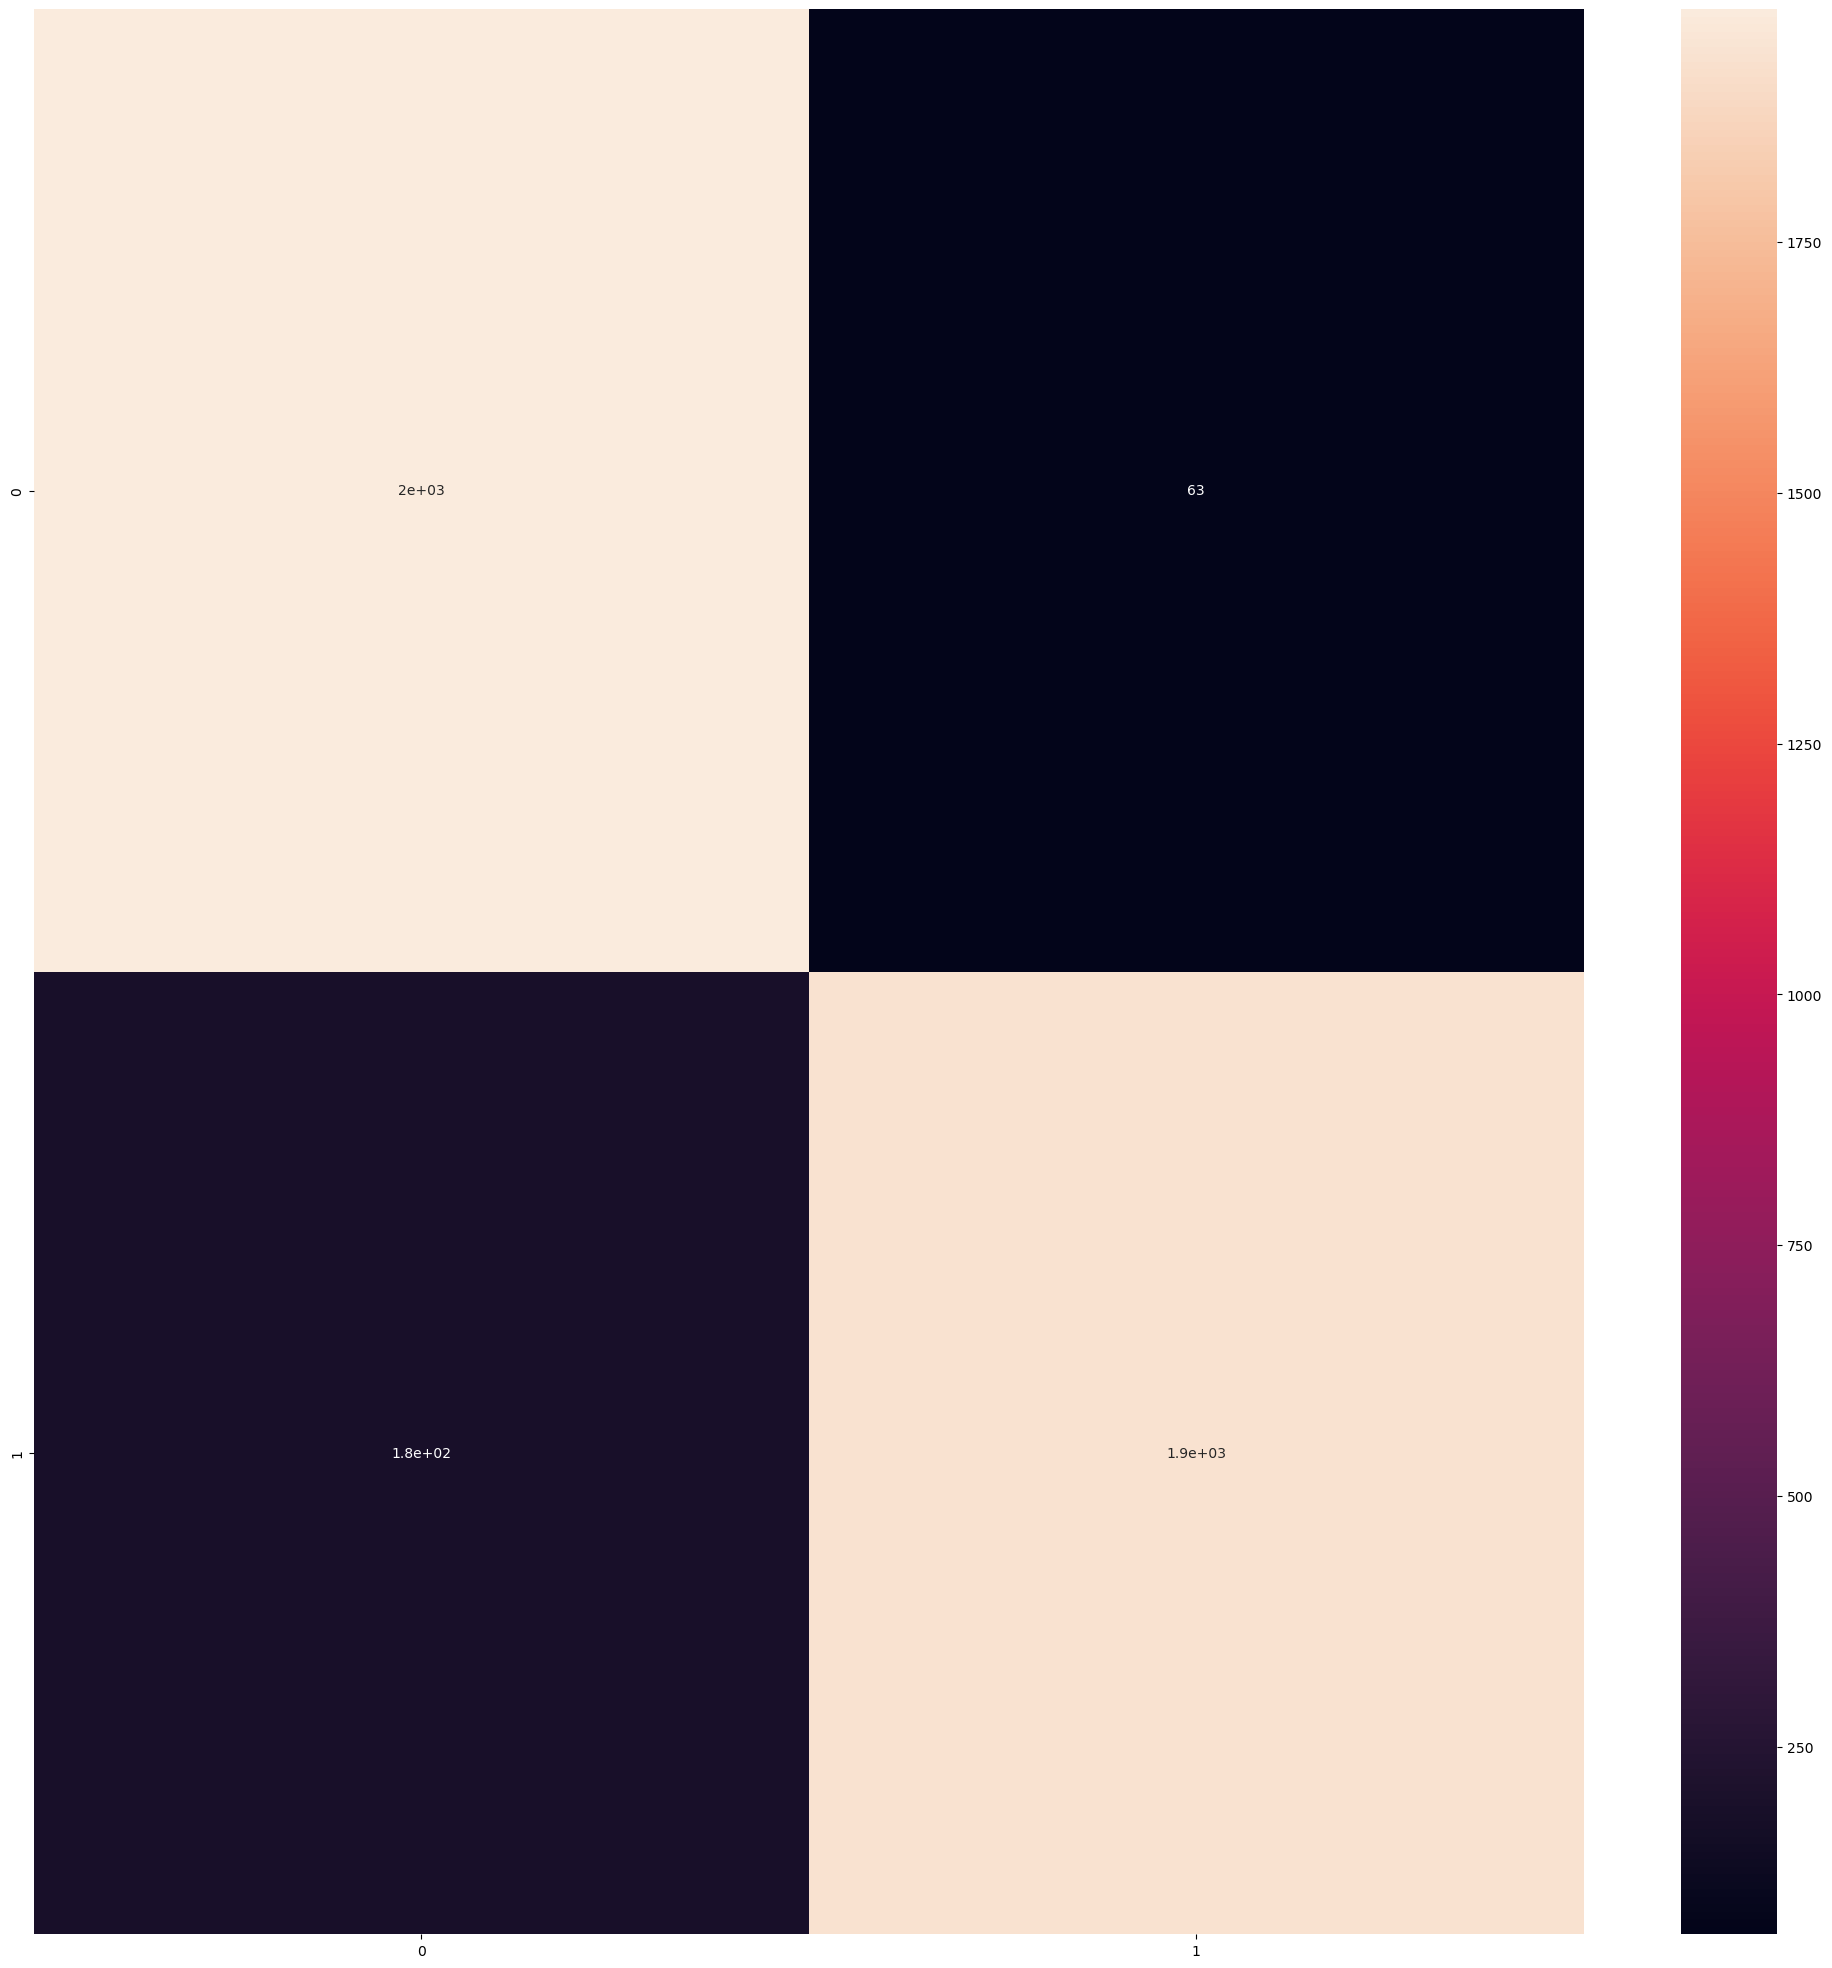

In [36]:
# Getting The Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(list(y_test), prediction)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)